In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.optimize as opt
import os, glob


In [14]:
#file=("/Users/sudoshuhei/Desktop/python/original.bmp")
#folder="/Users/sudoshuhei/Desktop/python"
image_size=96

In [15]:
X=[]

 
image = Image.open("/Users/sudoshuhei/Desktop/python/images/10kV570mA.bmp")
#image = image.convert("RGB")
image = image.convert('L')
image = image.resize((image_size, image_size))
data = np.asarray(image)
X.append(data)
X = np.array(X)
n=image_size*image_size
X=X.reshape(n)
print(X)
print(X.shape)

[38 39 44 ... 39 48 40]
(9216,)


In [16]:
#X=[]
#Y=[]
#for index, name in enumerate(folder):
#    dir = "./" + name
#    files = glob.glob(dir + "/*.bmp")
#    for i, file in enumerate(files):
# 
#        image = Image.open(file)
#        image = image.convert("RGB")
#        image = image.convert('L')
#        image = image.resize((image_size, image_size))
#        data = np.asarray(image)
#        X.append(data)
#        Y.append(index)
# 
#    X = np.array(X)
#    Y = np.array(Y)

#    print(X.shape)


In [17]:
#from PIL import Image
#img=Image.open(file)
#print(img)


In [18]:
#im=cv2.imread(file)

In [19]:
#print(im)

In [20]:
#plt.imshow(im)

In [21]:
#print(im.shape)

In [22]:
#gray=cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
#plt.imshow(gray)


In [23]:
#print(gray.shape)

In [24]:

#print(gray[0])

In [25]:
def twoD_Gaussian(XY, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    x,y = XY[0:2]
    xo = float(xo)
    yo = float(yo)
    #print(x)
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo)
                            + c*((y-yo)**2)))
    return g.ravel()

In [26]:
#x = np.linspace(0, 95, 96)
#y = np.linspace(0, 95, 96)
#x, y = np.meshgrid(x, y)
#print(x)


In [27]:
#x=np.ndarray(0,95)
x = np.linspace(0, 95, 96)
y = np.linspace(0, 95, 96)
x, y = np.meshgrid(x, y)
#z=x.reshape(1, 96, 96)
print(x)
#print(z)
#print(z.shape)
#data = twoD_Gaussian((x, y), 3, 100, 100, 20, 40, 0, 10)

[[ 0.  1.  2. ... 93. 94. 95.]
 [ 0.  1.  2. ... 93. 94. 95.]
 [ 0.  1.  2. ... 93. 94. 95.]
 ...
 [ 0.  1.  2. ... 93. 94. 95.]
 [ 0.  1.  2. ... 93. 94. 95.]
 [ 0.  1.  2. ... 93. 94. 95.]]


In [28]:
#plt.figure()
#plt.imshow(data.reshape(96,96))
#plt.colorbar()

In [29]:
#g=twoD_Gaussian()

In [30]:
initial_guess = (122,50,50,20,10,10,3)


In [31]:
popt, pcov = opt.curve_fit(twoD_Gaussian, (x,y), X, p0=initial_guess)
print(popt)
print('*')
print(pcov)
np.savetxt('10kV570mA',popt)

[234.99418999  54.02825641  35.438345     2.83245504   3.66379922
  10.92250298  41.080016  ]
*
[[ 1.95258642e+00  3.44355575e-09  2.32516677e-09 -1.17676563e-02
  -1.52213406e-02  3.25733166e-10  5.90719882e-11]
 [ 3.44355575e-09  4.73612396e-04  1.39049713e-05 -1.44842944e-12
  -5.21739241e-11 -5.12034265e-12 -6.25625156e-14]
 [ 2.32516677e-09  1.39049713e-05  2.84698611e-04 -2.66575785e-11
  -2.05335658e-12  1.83879190e-12  2.06190055e-13]
 [-1.17676563e-02 -1.44842944e-12 -2.66575785e-11  2.85746155e-04
   2.67173724e-06 -3.23215650e-11 -8.56822782e-05]
 [-1.52213406e-02 -5.21739241e-11 -2.05335658e-12  2.67173724e-06
   4.78086251e-04  4.13682598e-11 -1.10829132e-04]
 [ 3.25733166e-10 -5.12034265e-12  1.83879190e-12 -3.23215650e-11
   4.13682598e-11  2.61140333e-04 -2.49335897e-12]
 [ 5.90719831e-11 -6.25625156e-14  2.06190055e-13 -8.56822782e-05
  -1.10829132e-04 -2.49335897e-12  3.55427722e-03]]


In [32]:
data_fitted = twoD_Gaussian((x, y), *popt)
data_initial = twoD_Gaussian((x, y), *initial_guess)

In [33]:
print(data_fitted)

[41.080016 41.080016 41.080016 ... 41.080016 41.080016 41.080016]


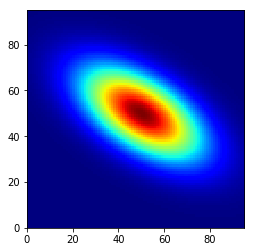

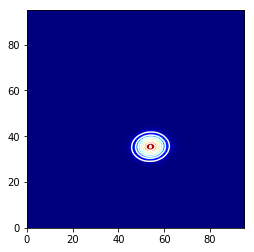

In [39]:
fig, ax = plt.subplots(1, 1)
ax.imshow(data_initial.reshape(96, 96), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()))
plt.show()


fig, ax = plt.subplots(1, 1)
ax.imshow(data_fitted.reshape(96, 96), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(96, 96), 8, colors='w')
plt.show()

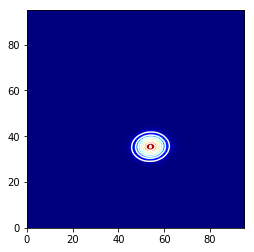

In [44]:
fig, ax = plt.subplots(1, 1)
ax.imshow(data_fitted.reshape(96, 96), cmap=plt.cm.jet, origin='lower',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(96, 96), 8, colors='w')


plt.savefig('fitted.png')